### Simple Neural Network
In this notebook we will build a small neural network using Tensorflow.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit

##### Load the data

In [102]:
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


##### Plot the data

(200,)


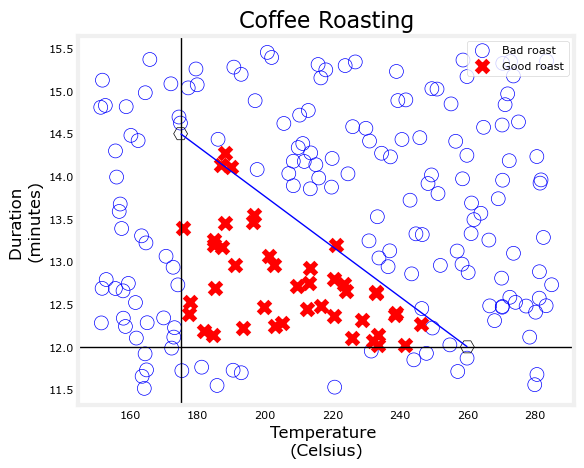

In [103]:
def plot_data(X, Y, ax):

    # Reshape Y to 1D array to be able to plot the data set.
    Y = Y.reshape(-1,)
    print(Y.shape)

    # Plot bad cases (all rows of both columns in X aka features such that corresponding value in Y is 0 for such rows)
    ax.scatter(X[Y==0, 0], X[Y==0, 1], color='b', marker='o', label='Bad roast', facecolors='none', s=100)

    # Plot good cases (all rows of both columns in X aka features such that corresponding value in Y is 1 for such rows)
    ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', marker='x', label='Good roast', s=70)

    # Plot the vertical line at x slightly less than 180 so that all good roasts are on the right side of this line
    ax.axvline(x=175, color='black', linewidth=1)

    # Plot the horizontal line at y slightly around 12 so that all good roasts are above this line
    ax.axhline(y=12, color='black', linewidth=1)

    ax.scatter(175, 14.5, color='black', marker='H', facecolors='none', s=100)
    ax.scatter(260, 12, color='black', marker='H', facecolors='none', s=100)

    ax.plot([175, 260], [14.5, 12], color='blue', linestyle='-', linewidth=1)

    # Plot the slanting line such that all good roasts are within the triangle formed by the three lines.
    #ax.plot([175, 14.5], [260, 12], color='black', linewidth=1)

    ax.set_title('Coffee Roasting', size=16)
    ax.set_xlabel("Temperature \n(Celsius)", size=12)
    ax.set_ylabel("Duration \n(minutes)", size=12)
    ax.legend(loc='upper right')

fig, ax = plt.subplots(1,1,)
plot_data(X, Y, ax)


#### Normalize the data

In [115]:
print(f"Pre normalization temperature range: {np.min(X[:,0]):0.2f} to {np.max(X[:,0]):0.2f}")
print(f"Pre normalization duration range: {np.min(X[:,1]):0.2f} to {np.max(X[:,1]):0.2f}")

# Normalize the data
norm_layer = tf.keras.layers.Normalization(axis=-1) 
norm_layer.adapt(X)
X_norm = norm_layer(X)

print(f"Post normalization temperature range: {np.min(X_norm[:,0]):0.2f} to {np.max(X_norm[:,0]):0.2f}")
print(f"Post normalization duration range: {np.min(X_norm[:,1]):0.2f} to {np.max(X_norm[:,1]):0.2f}")


Pre normalization temperature range: 151.32 to 284.99
Pre normalization duration range: 11.51 to 15.45
Post normalization temperature range: -1.69 to 1.66
Post normalization duration range: -1.70 to 1.79


In [116]:
Xt = np.tile(X_norm, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


#### TensorFlow model

In [117]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name='layer1'),
        Dense(1, activation='sigmoid', name='layer2')
    ]
)

In [118]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

#### Check the weights and bias of the neurons in each layer

In [119]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [125]:
# Print the weights and biases of the model
W1_in, b1_in = model.get_layer("layer1").get_weights()
W2_in, b2_in = model.get_layer("layer2").get_weights()


def print_collection(W, precision=3):
    print(np.array2string(W, precision=precision, separator=', ', suppress_small=True))

def print_weights(W1, b1, W2, b2):
    print_collection(W1)
    print_collection(b1)
    print_collection(W2)
    print_collection(b2)

print_weights(W1_in, b1_in, W2_in, b2_in)

W1_in, 
 [[-0.82  0.05  0.61]
 [-0.65  0.7   0.95]]
[[-0.823,  0.049,  0.609],
 [-0.653,  0.705,  0.947]]
[0., 0., 0.]
[[-0.679],
 [-0.774],
 [ 0.787]]
[0.]


#### Train the model with data

In [96]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)
model.fit(
    Xt, Yt,
    epochs = 10
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 285us/step - loss: 0.0036
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 285us/step - loss: 0.0026
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 284us/step - loss: 0.0019
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 284us/step - loss: 0.0014
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 285us/step - loss: 0.0011
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 282us/step - loss: 8.3444e-04
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step - loss: 6.4929e-04
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 287us/step - loss: 5.1005e-04
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 292us/step - loss: 4.0421e-04
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 288us/step - loss: 3.2323e-04


#### Weights and Bias after training the model with data

In [97]:
W1_out, b1_out = model.get_layer("layer1").get_weights()
W2_out, b2_out = model.get_layer("layer2").get_weights()
print_weights(W1_out, b1_out, W2_out, b2_out)

[[-12.199,  16.022,  -0.199],
 [ -0.256,  13.358,  -9.512]]
[-13.171,   2.284, -11.74 ]
[[-73.85 ],
 [-61.037],
 [-70.274]]
[41.825]


#### Making Predictions using the weights and bias recieved from the model post training

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X_test = np.array([
    [200,13.9],
    [200,17]
])

X_test_norm = norm_layer(X_test)

# Prediction at layer 1
pred_layer1 = sigmoid(np.dot(X_test_norm, W1_out) + b1_out)
print_collection(pred_layer1)

# Prediction at layer 2 aka final prediction
pred_final = sigmoid(np.dot(pred_layer1, W2_out) + b2_out)
print_collection(pred_final)

[[0.59, 1.  , 0.  ],
 [1.  , 1.  , 0.  ]]
[[1.],
 [0.]]


#### Making predictions using the Tensorflow library 
We can see that the final prediction that we calculated using the forward propagation with sigmoid activation is same as the prediction made using the Tensorflow library utility function. 

In [91]:
predictions = model.predict(X_test_norm)
print_collection(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.955],
 [0.   ]]


In [92]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


#### Plot the probability graph for layer 1 

[[-12.2   16.02  -0.2 ]
 [ -0.26  13.36  -9.51]]


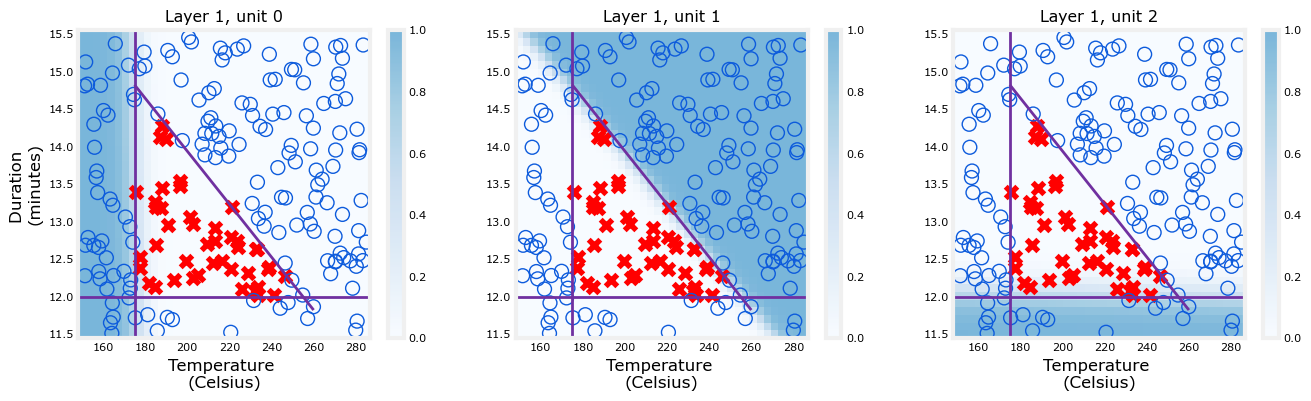

In [126]:
print(W1_out)
plt_layer(X,Y.reshape(-1,),W1_out, b1_out, norm_layer)